In [5]:
import itertools as it

import numpy as np
import pandas as pd


pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

pd.options.display.float_format = '{:,.4f}'.format

# Conclusions

Spotify has more strict definition of senior, Engineer II is almost senior, they are the ones that pay a lot

Suggestion pick ~top 25% of salary and above top of market on total compensation gives:

- engineer: ~55k salary >65k total compensation
- mid level > 65k salary >85k total compensation
- senior 70k salary (top 25% salary is 78k), >110k total compensation

# Glassdoor
Glassdoor salaries are much lower, they are basically old data

Klarna:
– Engineering	Software Engineer	SEK 44K - 51K/mo
– Senior Software Engineer	SEK 54K - 59K/mo
– Software Developer	SEK 40K - 49K/mo
– Senior Engineer	SEK 54K - 66K/mo

Spotify:
– Software Engineer	SEK 46K - 57K/mo
– Senior Software Engineer	SEK 59K - 69K/mo
– Software Developer	SEK 46K - 54K/mo

https://docs.google.com/spreadsheets/d/1Z4Rkqd6v_qXJnvyDbZ1jSBuJR3FYuATJc7RjXOAVBGY/edit#gid=0

In [61]:
df = pd.read_csv('/Users/anton/Documents/Depict/levels.fiy_stockholm.csv')

In [8]:
len(df)

40

In [83]:
df['senior'] = df['Level Name Tag'].str.contains('Senior|L3|L4|L5|SE 3|T25')
df['spotify_l2'] = df['Level Name Tag'].str.contains('Engineer II') | (
    df['Level Name Tag'].str.contains('L2') & 
    df['Company Location | Date'].str.contains('Spotify')
)
df['seniority'] = df.senior.astype(str) + df.spotify_l2.astype(str)

In [66]:
df.columns

Index(['Company Location | Date', 'Level Name Tag',
       'Years of Experience At Company / Total',
       'Total Comp ensation Base | Stock (/yr) | Bonus', 'senior',
       'spotify_l2', 'seniority'],
      dtype='object')

In [119]:
df['pay'] = df['Total Comp ensation Base | Stock (/yr) | Bonus'].str[1:8].str.strip().str.replace(',','')

# TODO: above formula is total comp, need to parse the other number for cash pay

In [68]:
df.pay = df.pay.astype(float) * 9/12

In [69]:
df.pay.describe()

count        40.0000
mean     66,581.2500
std      20,202.2139
min      34,500.0000
25%      52,125.0000
50%      63,000.0000
75%      78,187.5000
max     127,500.0000
Name: pay, dtype: float64

<AxesSubplot:>

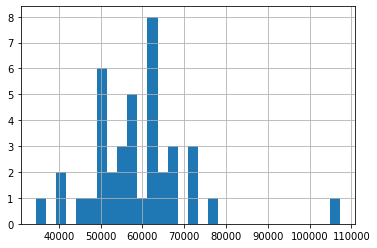

In [117]:
df.pay.hist(bins=30)

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

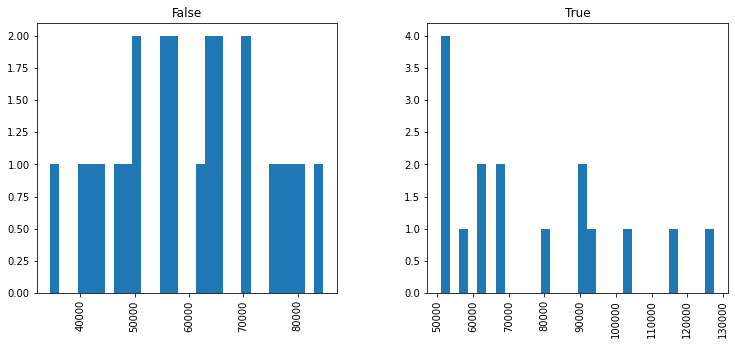

In [85]:
df.hist(column='pay', by='senior', bins=30, figsize=(12,5))

array([[<AxesSubplot:title={'center':'FalseFalse'}>,
        <AxesSubplot:title={'center':'FalseTrue'}>],
       [<AxesSubplot:title={'center':'TrueFalse'}>, <AxesSubplot:>]],
      dtype=object)

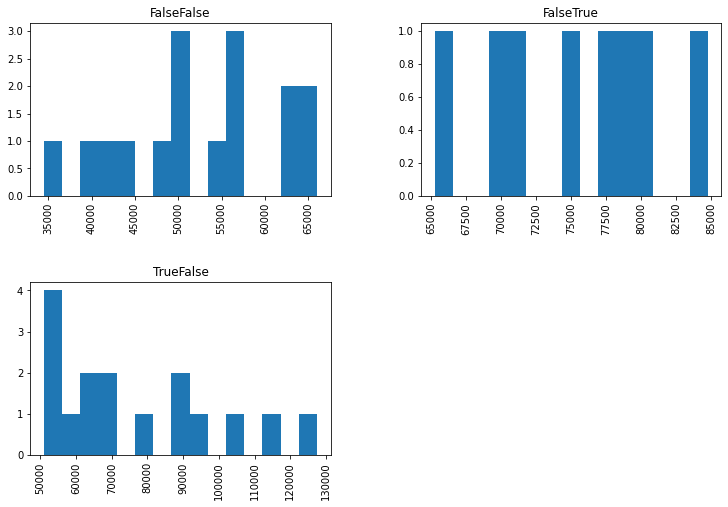

In [86]:
df.hist(column='pay', by='seniority', bins=15, figsize=(12,8))

# junior, spotify l2, the rest

In [118]:
df[df.senior].sort_values('pay')

,Company Location | Date,Level Name Tag,Years of Experience At Company / Total,Total Comp ensation Base | Stock (/yr) | Bonus,senior,spotify_l2,seniority,pay,ssenior,comp
16,"Trimble Stockholm, ST, Sweden | 3/4/21",L3 Firmware Engineer,3 / 6,"$68,000 66k | N/A | 4k",True,False,TrueFalse,"50,600.0000",True,"52,133.3333"
30,"Klarna Stockholm, ST, Sweden | 1/16/22",L3 Distributed Systems (Back-End),0 / 5,"$70,000 66k | 4k | N/A",True,False,TrueFalse,"50,600.0000",True,"53,666.6667"
7,"Klarna Stockholm, ST, Sweden | 2/15/20",L3 Full Stack,4 / 6,"$68,000 68k | N/A | N/A",True,False,TrueFalse,"52,133.3333",True,"52,133.3333"
8,"Klarna Stockholm, ST, Sweden | 2/15/20",Senior engineer Full Stack,3 / 5,"$71,000 71k | N/A | N/A",True,False,TrueFalse,"54,433.3333",True,"54,433.3333"
19,"Amazon Stockholm, ST, Sweden | 12/31/20",L5 Testing (SDET),0 / 7,"$89,000 73k | 16k | N/A",True,False,TrueFalse,"55,966.6667",True,"68,233.3333"
26,"Klarna Stockholm, ST, Sweden | 8/29/21",L3 Full Stack,1 / 11,"$75,000 75k | N/A | N/A",True,False,TrueFalse,"57,500.0000",True,"57,500.0000"
17,"Klarna Stockholm, ST, Sweden | 2/15/21",Senior Software Engineer Full Stack,0 / 10,"$83,000 80k | 2k | N/A",True,False,TrueFalse,"61,333.3333",True,"63,633.3333"
33,"Spotify Stockholm, ST, Sweden | 1/6/22",Senior Engineer Distributed Systems (Back-End),5 / 9,"$90,000 80k | 10k | N/A",True,False,TrueFalse,"61,333.3333",True,"69,000.0000"
5,"Klarna Stockholm, ST, Sweden | 2/25/20",L4 Full Stack,7 / 7,"$83,000 83k | N/A | N/A",True,False,TrueFalse,"63,633.3333",True,"63,633.3333"
39,"PayPal Stockholm, ST, Sweden | 10/21/21",T25 iOS,2 / 12,"$136,000 85k | 43k | 8k",True,False,TrueFalse,"65,166.6667",True,"104,266.6667"


In [88]:
df[~df.senior].sort_values('pay')

,Company Location | Date,Level Name Tag,Years of Experience At Company / Total,Total Comp ensation Base | Stock (/yr) | Bonus,senior,spotify_l2,seniority,pay,ssenior
25,"Klarna Stockholm, ST, Sweden | 9/6/21",L2 API Development (Back-End),3 / 12,"$46,000 45k | 1k | N/A",False,False,FalseFalse,"34,500.0000",False
28,"Spotify Stockholm, ST, Sweden | 7/28/21",Engineer I Mobile (iOS + Android),2 / 2,"$53,000 53k | N/A | N/A",False,False,FalseFalse,"39,750.0000",False
24,"Klarna Stockholm, ST, Sweden | 9/16/21",L1 API Development (Back-End),0 / 0,"$55,000 54k | 1k | N/A",False,False,FalseFalse,"41,250.0000",False
6,"Klarna Stockholm, ST, Sweden | 2/17/20",Lv 2 Distributed Systems (Back-End),1 / 4,"$59,000 59k | N/A | N/A",False,False,FalseFalse,"44,250.0000",False
9,"Klarna Stockholm, ST, Sweden | 2/15/20",L2 Full Stack,5 / 8,"$63,000 64k | N/A | N/A",False,False,FalseFalse,"47,250.0000",False
20,"Klarna Stockholm, ST, Sweden | 10/20/21",L2 Data,1 / 5,"$66,000 66k | N/A | N/A",False,False,FalseFalse,"49,500.0000",False
29,"Klarna Stockholm, ST, Sweden | 7/14/21",L2 Distributed Systems (Back-End),2 / 4,"$67,000 67k | N/A | N/A",False,False,FalseFalse,"50,250.0000",False
3,"Klarna Stockholm, ST, Sweden | 9/4/20",L2 Full Stack,1 / 5,"$68,000 68k | N/A | N/A",False,False,FalseFalse,"51,000.0000",False
35,"Meltwater Gothenburg, VG, Sweden | 12/25/21",L2 Distributed Systems (Back-End),1 / 2,"$73,000 67k | N/A | 6k",False,False,FalseFalse,"54,750.0000",False
15,"Klarna Stockholm, ST, Sweden | 3/9/21",L2 Full Stack,1 / 3,"$74,000 71k | 3k | N/A",False,False,FalseFalse,"55,500.0000",False


In [90]:
df[~df.senior&~df.spotify_l2].sort_values('pay')

,Company Location | Date,Level Name Tag,Years of Experience At Company / Total,Total Comp ensation Base | Stock (/yr) | Bonus,senior,spotify_l2,seniority,pay,ssenior
25,"Klarna Stockholm, ST, Sweden | 9/6/21",L2 API Development (Back-End),3 / 12,"$46,000 45k | 1k | N/A",False,False,FalseFalse,"34,500.0000",False
28,"Spotify Stockholm, ST, Sweden | 7/28/21",Engineer I Mobile (iOS + Android),2 / 2,"$53,000 53k | N/A | N/A",False,False,FalseFalse,"39,750.0000",False
24,"Klarna Stockholm, ST, Sweden | 9/16/21",L1 API Development (Back-End),0 / 0,"$55,000 54k | 1k | N/A",False,False,FalseFalse,"41,250.0000",False
6,"Klarna Stockholm, ST, Sweden | 2/17/20",Lv 2 Distributed Systems (Back-End),1 / 4,"$59,000 59k | N/A | N/A",False,False,FalseFalse,"44,250.0000",False
9,"Klarna Stockholm, ST, Sweden | 2/15/20",L2 Full Stack,5 / 8,"$63,000 64k | N/A | N/A",False,False,FalseFalse,"47,250.0000",False
20,"Klarna Stockholm, ST, Sweden | 10/20/21",L2 Data,1 / 5,"$66,000 66k | N/A | N/A",False,False,FalseFalse,"49,500.0000",False
29,"Klarna Stockholm, ST, Sweden | 7/14/21",L2 Distributed Systems (Back-End),2 / 4,"$67,000 67k | N/A | N/A",False,False,FalseFalse,"50,250.0000",False
3,"Klarna Stockholm, ST, Sweden | 9/4/20",L2 Full Stack,1 / 5,"$68,000 68k | N/A | N/A",False,False,FalseFalse,"51,000.0000",False
35,"Meltwater Gothenburg, VG, Sweden | 12/25/21",L2 Distributed Systems (Back-End),1 / 2,"$73,000 67k | N/A | 6k",False,False,FalseFalse,"54,750.0000",False
15,"Klarna Stockholm, ST, Sweden | 3/9/21",L2 Full Stack,1 / 3,"$74,000 71k | 3k | N/A",False,False,FalseFalse,"55,500.0000",False
